# DATA IMPORT AND INITIAL EXPLORATION

In [1]:
# IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd

In [2]:
# READ THE DATA FROM 'spam' WITH SPECIFIC ENCODING
df = pd.read_csv('spam' , encoding ="ISO-8859-1")

# DISPLAY THE FIRST 10 ROWS OF THE DATASET
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [3]:
# DISPLAY THE SHAPE OF THE DATASET
print(df.shape)

(5572, 5)


In [4]:
# DISPLAY INFORMATION ABOUT THE DATASET
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [5]:
# DROP UNNECESSARY COLUMNS
df.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'], inplace=True)

# DISPLAY THE FIRST FEW ROWS AFTER DROPPING COLUMNS
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# RENAME COLUMNS FOR CLARITY
df.rename(columns={'v1':'target' , 'v2':'text'} , inplace='True')

# DISPLAY THE FIRST FEW ROWS AFTER RENAMING COLUMNS
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# ENCODE TARGET VARIABLE

In [7]:
# IMPORT LABEL ENCODER AND ENCODE THE 'TARGET' COLUMN
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

# DISPLAY THE FIRST FEW ROWS AFTER ENCODING
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# DATA CLEANING

In [8]:
# CHECK FOR MISSING VALUES IN THE DATASET
print(df.isnull().sum())

target    0
text      0
dtype: int64


In [9]:
# CHECK FOR DUPLICATE ROWS IN THE DATASET
print("DUPLICATES:", df.duplicated().sum())

DUPLICATES: 403


In [10]:
# DROP DUPLICATE ROWS FROM THE DATASET
df = df.drop_duplicates(keep='first')

# VERIFY NO DUPLICATES REMAIN IN THE DATASET
print("DUPLICATES AFTER REMOVAL:", df.duplicated().sum())

DUPLICATES AFTER REMOVAL: 0


In [11]:
# DISPLAY THE SHAPE OF THE DATASET AFTER CLEANING
print(df.shape)

(5169, 2)


In [12]:
# DISPLAY THE DISTRIBUTION OF THE TARGET VARIABLE 'TARGET'
print(df['target'].value_counts())

target
0    4516
1     653
Name: count, dtype: int64


# DATA VISUALIZATION

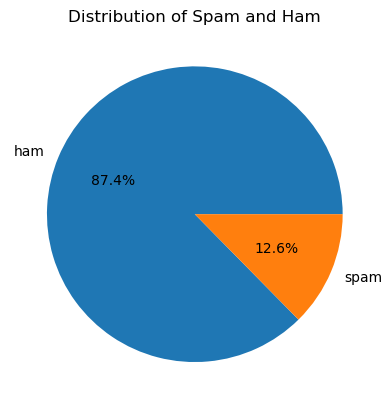

In [13]:
# PLOT THE DISTRIBUTION OF 'TARGET'
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')
plt.title('Distribution of Spam and Ham')
plt.show()

# FEATURE AND LABEL SEPARATION

In [14]:
# SEPARATE FEATURES AND LABELS
X = df['text']
Y = df['target']

In [15]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

In [16]:
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: target, dtype: int32

# SPLIT THE DATA INTO TRAINING AND TEST SETS

In [17]:
# IMPORTING train_test_split FROM sklearn TO SPLIT THE DATA
from sklearn.model_selection import train_test_split

# SPLIT THE DATA INTO TRAINING AND TEST SETS
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size=0.2 ,random_state=2) 

In [18]:
# DISPLAY THE SHAPES OF THE SPLIT DATA
print("X shape = {} ".format(X.shape))
print("X_train shape = {}".format(X_train.shape))
print("X_test shape = {} \n".format(X_test.shape))
print("Y shape = {}".format(Y.shape))
print("Y_train shape = {}".format(Y_train.shape))
print("Y_test shape = {}".format(Y_test.shape))

X shape = (5169,) 
X_train shape = (4135,)
X_test shape = (1034,) 

Y shape = (5169,)
Y_train shape = (4135,)
Y_test shape = (1034,)


# FEATURE EXTRACTION

In [19]:
# IMPORT TF-IDF VECTORIZER AND TRANSFORM THE TEXT DATA
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df =1 , stop_words='english',lowercase=True)

X_train_features = tfidf_vectorizer.fit_transform(X_train)
X_test_features = tfidf_vectorizer.transform(X_test)

In [21]:
# CALCULATE SCALE POSITIVE WEIGHT FOR IMBALANCED CLASSES
scale_pos_weight = Y_train.value_counts()[0] / Y_train.value_counts()[1]
print("SCALE POSITIVE WEIGHT:", scale_pos_weight)

SCALE POSITIVE WEIGHT: 7.029126213592233


# MODEL TRAINING (XGBoost)

In [22]:
# IMPORT XGBOOST CLASSIFIER AND TRAIN THE MODEL
from xgboost import XGBClassifier

# TRAIN THE XGBoost CLASSIFIER
model = XGBClassifier(scale_pos_weight =scale_pos_weight , use_label_encoder = False,eval_metric ='logloss')
model.fit(X_train_features , Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

# MODEL PREDICTION

In [23]:
# MAKE PREDICTIONS ON THE TEST SET
Y_pred = model.predict(X_test_features)
Y_pred_proba = model.predict_proba(X_test_features)[:, 1] 

# MODEL EVALUATION

In [24]:
# IMPORT METRICS FOR EVALUATION
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# PRINT CONFUSION MATRIX
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

# PRINT ACCURACY SCORE
print("\nAccuracy Score:\n", accuracy_score(Y_test, Y_pred))

# PRINT ROC-AUC SCORE
print("\nROC-AUC Score:\n", roc_auc_score(Y_test, Y_pred_proba))

Confusion Matrix:
 [[891   5]
 [ 22 116]]

Accuracy Score:
 0.9738878143133463

ROC-AUC Score:
 0.9814311594202898
